# Introdução ao statsmodels

Objetivos:
- Entender o uso da regressão linear múltipla
- Aprender sobre a análise de resíduos na regressão linear múltipla

## Índice <a name="topo"></a>

1. [Regressão múltipla](#1)
2. [Análise de resíduos](#2)
3. [Análise dos valores preditos](#3)

In [21]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [22]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


## <span style="color:blue">1. Regressão múltipla </span><a name="1"></a>

<div style="text-align: right"
     
[Voltar ao índice](#topo) </div>

In [23]:
reg = smf.ols('np.log(tip) ~ C(size) + np.log(net_bill)', data = tips).fit()

In [24]:
tips['res_log'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     22.31
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           8.67e-21
Time:                        14:11:49   Log-Likelihood:                -88.627
No. Observations:                 244   AIC:                             191.3
Df Residuals:                     237   BIC:                             215.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3111      0.202     -1.543      0.124      -0.708       0.086
C(size)[T.2]         0.2169      0.187      1.161      0.247      -0.151       0.585
C(size)[T.3]         0.3430      0.200      1.712      0.088      -0.052       0.738
C(size)[T.4]         0.4559      0.206      2.210      0.028       0.049       0.862
C(size)[T.5]         0.4122      0.255      1.618      0.107      -0.090       0.914
C(size)[T.6]         0.6721      0.270      2.493      0.013       0.141       1.203
np.log(net_bill)     0.3810      0.059      6.420      0.000       0.264       0.498
==============================================================================
Omnibus:                        6.180   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                8.912
Skew:                           0.108   Prob(JB):                       0.0116
Kurtosis:                       3.911   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <span style="color:blue">2. Análise de resíduos</span><a name="1"></a>

<div style="text-align: right"
     
[Voltar ao índice](#topo) </div>

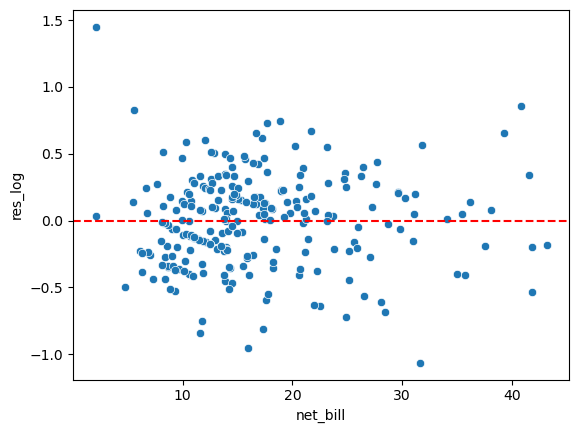

In [25]:
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

<Axes: xlabel='sex', ylabel='res_log'>

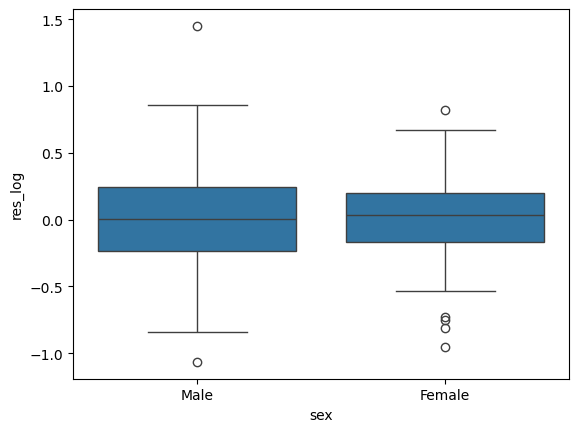

In [26]:
sns.boxplot(x = 'sex', y = 'res_log', data = tips)

<Axes: xlabel='smoker', ylabel='res_log'>

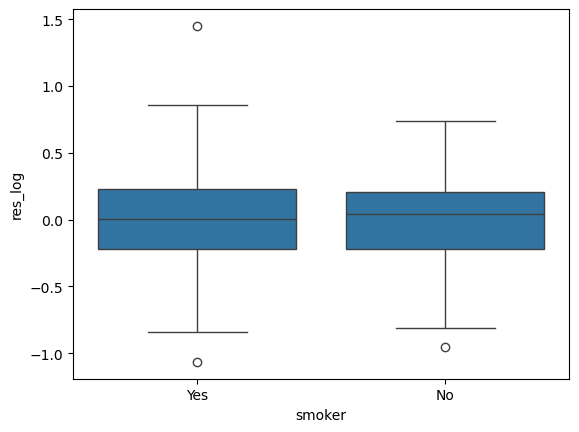

In [27]:
sns.boxplot(x = 'smoker', y = 'res_log', data = tips)

<Axes: xlabel='day', ylabel='res_log'>

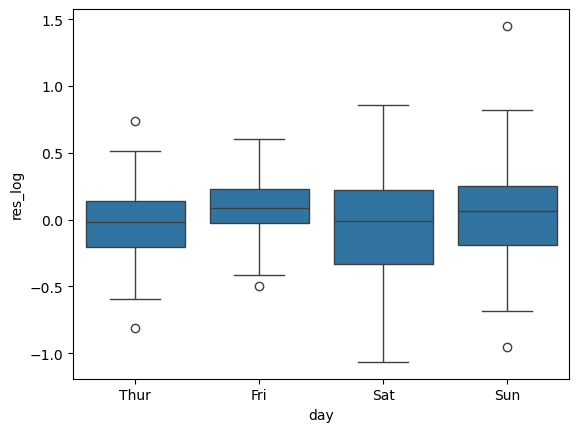

In [28]:
sns.boxplot(x = 'day', y = 'res_log', data = tips)

<Axes: xlabel='size', ylabel='res_log'>

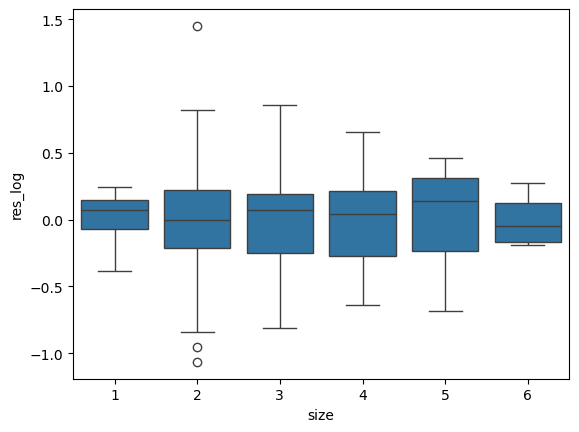

In [29]:
sns.boxplot(x = 'size', y = 'res_log', data = tips)

## <span style="color:blue">3. Análise dos valores preditos</span><a name="1"></a>

<div style="text-align: right"
     
[Voltar ao índice](#topo) </div>

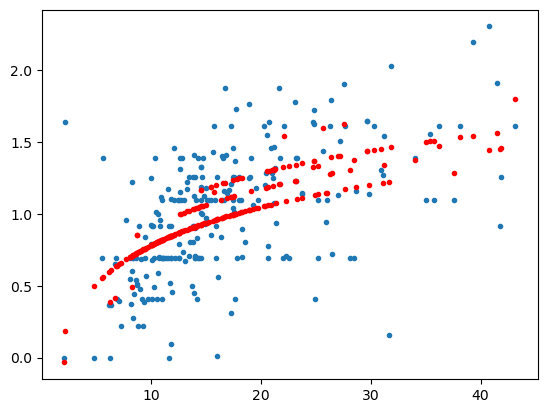

In [31]:
tips['tip_log']= np.log(tips['tip'])
tips['pred_log'] = reg.fittedvalues

plt.plot(tips['net_bill'], tips['tip_log'], '.')
plt.plot(tips['net_bill'], tips['pred_log'], 'r.')